<h1><b>Ο Αλγόριθμος <i>Metropolis-Hastings</i></b></h1>

<b>Σημείωση</b>: Η άσκηση αυτή έχει βασιστεί στο άρθρο που μπορεί να βρεθεί <a href="https://www.tweag.io/blog/2019-10-25-mcmc-intro1/">εδώ</a>. Στο συγκεκριμένο άρθρο μπορεί να βρεθεί μια πιο αναλυτική εισαγωγή στις μεθόδους <b><i>Monte Carlo Markov Chain</i> (<i>MCMC</i>)</b> και στον αλγόριθμο <b><i>Metropolis-Hastings</i></b>, καθώς και συνοδευτικά άρθρα για πιο προχωρημένα ζητήματα.

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>Metropolis-Hastings</i></b>. Συγκεκριμένα, θα χρησιμοποιήσετε τον αλγόριθμο για να λάβετε δειγματικά στοιχεία (sampling points) από μία <b><i>τυπική κανονική κατανομή</i> (<i>standard normal distribution</i>)</b>, δηλαδή μία κανονική κατανομή συνεχούς τυχαίας μεταβλητής με μέση τιμή $μ=0$ και τυπική απόκλιση $σ=1$. 

Ως <b><i>proposal conditional density</i></b> θα λάβετε μία ομοιόμορφη κατανομή στο διάστημα $(-\frac{Δ}{2}, \frac{Δ}{2})$. Αφού η <b><i>proposal conditional density</i></b> που θα χρησιμοποιήσετε είναι μία συμμετρική κατανομή, ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα λάβει την απλοποιημένη μορφή του, δηλαδή η πιθανότητα να πραγματοποιήσετε μία μετάβαση από την κατάσταση $x_{old}$ στην κατάσταση $x_{new}$ για μια κατανομή $π$ θα δίνεται από τον παρακάτω τύπο:

$$
p_{accept}(x_{new} | x_{old}) = min\left[1, \frac{π(x_{new})}{π(x_{old})}\right]
$$

Αναλυτικές οδηγίες σχετικά με το πώς προκύπτει ο παραπάνω τύπος περιλαμβάνονται στις διαφάνειες του μαθήματος, αλλά και στο άρθρο πάνω στο οποίο βασίστηκε η συγκεκριμένη άσκηση.

<h3><b>Υλοποίηση του Αλγορίθμου <i>Metropolis-Hastings</i> σε Python</b></h3>

Αρχικά, θα ορίσουμε τη μέθοδο <b><i>log_prob</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την <b><i>τυπική κανονική κατανομή</i></b>. Να σημειωθεί ότι λαμβάνεται ο λογάριθμος της κατανομής αυτής. Ο λογάριθμος αυτός μπορεί να υπολογιστεί εύκολα από τον τύπο της <b><i>τυπικής κανονικής κατανομής</i></b>, που είναι διαθέσιμος από <a href="https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution">εδώ</a>. Λόγοι για τους οποίους προτιμάται αυτή η μορφή μπορούν να αναζητηθούν <a href="https://stats.stackexchange.com/questions/137710/metropolis-hastings-using-log-of-the-density">εδώ</a>. Τέλος, οι σταθερές μπορούν να αγνοηθούν από τον τύπο με ασφάλεια λόγω της μορφή του αλγορίθμου <b><i>Metropolis-Hastings</i></b>.

In [1]:
def log_prob(x):
     return -0.5 * np.float64(x ** 2)

Στη συνέχεια, ορίζουμε τη μέθοδο <b><i>proposal</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την ομοιόμορφη κατανομή, η οποία αποτελεί την <b><i>proposal conditional density</i></b>.

In [2]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize, 
                             high=x + 0.5 * stepsize, 
                             size=x.shape)

Η πιθανότητα αποδοχής μιας νέας κατάστασης $x_{new}$ δεδομένης της τρέχουσας κατάστασης $x_{old}$ υπολογίζεται από τη παρακάτω μέθοδο. Να σημειωθεί πως στη συγκεκριμένη μέθοδο, ο τύπος $p_{accept}$ που δόθηκε παραπάνω έχει τροποποιηθεί κατάλληλα, ώστε να μην εμφανίζονται αρνητικές τιμές. Οι δύο μορφές του τύπου είναι ισοδύναμες, καθώς σημασία έχει η σύγκριση δύο τιμών και όχι οι ακριβείς τιμές, όπως φαίνεται από τον παραπάνω τύπο.

In [3]:
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

Στη συνέχεια, υλοποιείται η μέθοδος με την οποία θα αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα.

In [4]:
import numpy as np
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

Τέλος, ορίζεται μία συνάρτηση που μετράει πόσες φορές έγιναν αποδεκτά τα προτεινόμενα βήματα.

In [5]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept
    
    acceptance_rate = n_accepted / float(n_total)
    
    return chain, acceptance_rate

<h3><b>Ερωτήματα (Μέρος Α)</b></h3>

<ul>
<li>Με ποιον τρόπο αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα; Να εξηγήσετε συνοπτικά βάσει των παραπάνω μεθόδων.</li>
<li>Με ποιον τρόπο αξιοποιούνται οι <b><i>αλυσίδες Markov</i> (<i>Markov Chains</i>)</b> από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> για τη λήψη τυχαίων δειγματικών σημείων από μία κατανομή πιθανοτήτων;</li>
<li>Ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> χρησιμοποιείται για τη λήψη τυχαίου δείγματος από μία κατανομή πιθανοτήτων για την οποία είναι αδύνατο να λάβουμε τέτοια δειγματικά στοιχεία λόγω αδυναμίας πλήρους καταγραφής του δειγματικού χώρου ή/και υπολογισμού κάποιας <b><i>σταθεράς κανονικοποίησης</i></b> που εμφανίζεται στην κατανομή. Έτσι, λαμβάνεται ως <b><i>κατανομή στόχος</i></b> μία κατανομή που έχει γνωστή μορφή, ανάλογη με την κατανομή από την οποία θέλουμε να λάβουμε τα δειγματικά στοιχεία. Με ποιον τρόπο καταφέρνει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> να δώσει αποτελέσματα παρά το γεγονός ότι αγνοεί τη <b><i>σταθερά κανονικοποίησης</i></b>;
</ul>

Αρχικά, ο αλγόριθμος Metropolis-Hastings είναι μια μέθοδος MCMC (Markov Chain Monte Carlo) για την παραγωγή μιας ακολουθίας τυχαίων δειγμάτων από μια κατανομή για την οποία η απευθείας δειγματοληψία είναι δύσκολη ή και αδύνατη. Η ακολουθία αυτή χρησιμοποιείται έπειτα για την προσέγγιση της ίδιας της κατανομής ή τον υπολογισμό ενός μεγέθους όπως πχ μιας αναμενόμενης τιμής. Ο αλγόριθμος Metropolis-Hastings είναι ιδιαίτερα χρήσιμος στην περίπτωση κατανομών πολλών διαστάσεων όπου αλγόριθμοι όπως ο Rejection Sampling είναι μη αποδοτικοί για δειγματοληψία. Μια ιδιότητα του αλγορίθμου υπό εξέταση είναι ότι δειγματοληπτούνται δείγματα των οποίων τα δειγματικά στοιχεία δεν είναι ανεξάρτητα, καθώς κάθε δειγματικό στοιχείο εξαρτάται από το προηγούμενό του. Αυτός είναι και ο λόγος που ομιλούμε για Markov Chain όπου ισχύει αυτή η εξάρτηση.

Στη γενική περίπτωση θέλουμε να κάνουμε sampling από μια κατανομή $p(x) = \frac{f(x)}{NC}$, όπου NC εν γένει άγνωστο normalizing constant. Εν προκειμένω για το πρόβλημα που μελετούμε, έχουμε ότι $p(x) \sim N(0,1)$ και άρα αγνοώντας το normalizing constant θα έχουμε $f(x) = exp(-\frac{x^2}{2})$. Εν προκειμένω είναι σχετικά εύκολο με ολοκλήρωση να βρεθεί το NC (normalizing constant) γνωρίζοντας τη μορφή της f(x) και άρα να προσδιοριστεί πλήρως η p(x). Ωστόσο, υπάρχουν περιπτώσεις ειδικά σε πολυδιάστατες κατανομές όπου ακόμα και αυτή η ολοκλήρωση δεν είναι προφανής ή και δυνατή. Έτσι, θέλουμε να λάβουμε samples από την κατανομή p(x) και για την επίτευξη αυτού του στόχου δομείται μια Markov Chain όπως η επόμενη:
\
<img src="Markov_chain.JPG">

Αγνοώντας κάποιες αρχικές καταστάσεις, τα δειγματικά στοιχεία που προκύπτουν από την τυχαία μεταβλητή και κατάσταση $X_Β$ κι έπειτα θα είναι από την κατανομή p(x) εφόσον αυτή είναι η αναλοίωτη κατανομή της Markov chain.

Η μέθοδος του αλγορίθμου Metropolis-Hastings για την δειγματοληψία από την p(x) έγκειται στην πραγματοποίηση δύο βημάτων.

1) Όντας σε μια κατάσταση (το τελευταίο δειγματικό στοιχείο του δείγματος ως το σημείο αυτό) $x_t$, το proposal step είναι η νέα κατάσταση / νέο δειγματικό στοιχείο να είναι $x_{t+1}$ με βάση μια κατανομή $g(x_{t+1}|x_t)$ η οποία εν γένει έχει πιο απλή μορφή από την p(x). Εν προκειμένω, χρησιμοποιείται η ομοιόμορφη κατανομή $g(x_{t+1}|x_t) = U(-\frac{Δ}{2}, \frac{Δ}{2})$ η οποία είναι κεντραρισμένη στο $x_t$ και είναι συμμετρική. Εφόσον είναι συμμετρική η proposal conditional density distribution, τότε ο αλγόριθμος Metropolis-Hastings (MH) απλοποείται στον αλγόριθμο Metropolis.

    <img src="Uniform_distribution.JPG">

2) Η κατάσταση που προτείνεται από το proposal step ως επόμενη $x_{t+1}$ γίνεται αποδεκτή με μία πιθανότητα (acceptance probability) $A(x_t \rightarrow x_{t+1})$, δεδομένης της τρέχουσας κατάστασης / δειγματικού στοιχείου $x_t$.

Σε θεωρητικό επίπεδο, γνωρίζουμε πως για να έχει μια Markov Chain αναλλοίωτη κατανομή την p(x) αρκεί ο πυρήνας μετάβασης $T(a \rightarrow b)$ να υπακούει στη συνθήκη Detailed Balance. Όταν συμβαίνει αυτό, ουσιαστικά ξέρουμε ότι συμβαίνουν όσα αναφέρουμε, δηλαδή ότι οι καταστάσεις της αλυσίδας μετά την πάροδο του μεταβατικού φαινομένου αντιπροσωπεύουν ουσιαστικά δειγματικά στοιχεία της p(x) και άρα υλοποιούν τη ζητούμενη δειγματοληψία.

Detailed balance condition $\forall$ a, b:

$p(a) \cdot T(a \rightarrow b) = p(b) \cdot T(b \rightarrow a)$

$\frac{f(a)}{NC} \cdot g(b|a) \cdot A(a \rightarrow b) = \frac{f(b)}{NC} \cdot g(a|b) \cdot A(b \rightarrow a)$

$\frac{A(a \rightarrow b)}{A(b \rightarrow a) } = \frac{f(b)}{f(a)} \cdot \frac{g(a|b)}{g(b|a)} = r_f \cdot r_g$, where $r_f = \frac{f(b)}{f(a)}$ and $r_g = \frac{g(a|b)}{g(b|a)}$


Διακρίνουμε δύο περιπτώσεις:

1) $r_f \cdot r_g < 1$:

- $ A(a \rightarrow b) = r_f \cdot r_g$

- $ A(b \rightarrow a) = 1 $
    
2) $r_f \cdot r_g >= 1$:

- $A(a \rightarrow b) = 1$
- $A(b \rightarrow a) = \frac{1}{r_f \cdot r_g}$

Συγχωνεύοντας τις δύο περιπτώσεις προκύπτει: $A(a \rightarrow b) = max(1, r_f \cdot r_g)$


Όταν, όμως, η proposal κατανομή $g(x_{t+1}|x_t)$ είναι συμμετρική ισχύει $g(a|b) = g(b|a) \Rightarrow r_g=1$ και άρα $A(a \rightarrow b) = max(1, r_f) = max(1, \frac{f(b)}{f(a)}) = max(1, \frac{p(b)}{p(a)})$ το οποίο είναι ειδική περίπτωση του Metropolis-Hastings αλγορίθμου που ονομάζεται απλώς ως Metropolis από το δημιουργό της. Τότε:

1) Αν $p(b) > p(a)$:
- $A(a \rightarrow b) = 1$, οπότε η επόμενη κατάσταση ή επόμενο δειγματικό στοιχείο που δειγματοληπτούμε γίνεται αποδεκτό με σιγουριά (πιθανότητα 1). Αυτό συμβαίνει γιατί κινούμαστε προς μια περιοχή της κατανομής με μεγαλύτερη πυκνότητα πιθανότητας αφού $p(b) > p(a)$. Αυτό είναι και το πλεονέκτημα του αλγορίθμου δειγματοληψίας Metropolis-Hastings έναντι άλλων αλγορίθμων που γεννούν ανεξάρτητα δείγματα. Ο αλγόριθμος Metropolis-Hastings έχει μνήμη και τείνει να γεννά περισσότερα δείγματα κοντά στα σημεία που η πυκνότητα p(x) είναι υψηλή.
    
    
2) Αν $p(b) < p(a)$:
- $A(a \rightarrow b) = \frac{f(b)}{f(a)}$, όπου βέβαια η f(x) είναι γνωστή. Εν προκειμένω, $f(x) = exp(-\frac{x^2}{2})$ και άρα $A(a \rightarrow b) = \frac{f(b)}{f(a)}$. Έχουμε για την f(x) ότι $log(f(x)) = log(exp(-\frac{x^2}{2})) = -\frac{x^2}{2}$ από το οποίο προκύπτει: $A(a \rightarrow b) = \frac{f(b)}{f(a)} = exp(log(A(a \rightarrow b))) = exp(log(\frac{f(b)}{f(a)})) = exp(log(f(b)) - log(f(a)))$. Αυτή η μετατροπή με το λογάριθμο είναι χρήσιμη για τον ευκολότερο μαθηματικό υπολογισμό της τιμής. Για παράδειγμα αυτή η acceptance probability μπορεί να προκύψει ίση με A = 0.6. Στην περίπτωση αυτή για να αποφασιστεί αν τελικά θα είναι η επόμενη κατάσταση της αλυσίδας (αντίστοιχα δειγματικό στοιχείο της p(x)) η b, γεννάται τυχαία ένας αριθμός στο [0,1) μέσω της numpy.random.random, και συγκρίνεται αυτός ο τυχαία γεννημένος αριθμός με την τιμή A. Αν η τιμή acceptance/αποδοχής είναι μεγαλύτερη τότε η επόμενη κατάσταση αποφασίζεται να είναι η b, αλλιώς η a (μεταβαίνει δηλαδή στην ίδια κατάσταση με πριν). Αυτή η περίπτωση είναι ουσιατικά κίνηση προς μια περιοχή με μικρότερη πυκνότητα πιθανότητας αφού $p(b) < p(a)$, η οποία δεν είναι σίγουρη αλλά γίνεται με πιθανότητα μικρότερη της μονάδας, ουσιαστικά περιορίζοντας τέτοιες κινήσεις. Ό,τι κινήσεις απορριφθούν (δεν γίνει η κίνηση $a \rightarrow b$, αλλά έχουμε παραμονή στην κατάσταση a), θα εμπίπτουν σε αυτή την περίπτωση.

Τέλος, όπως είναι εμφανές από τα προηγούμενα, ο αλγόριθμος Metropolis-Hastings καταφέρνει να δώσει αποτελέσματα αγνοώντας το normalizing constant, καθώς αυτό γίνεται cancel out στο ratio $r_f$.

<h3><b>Δοκιμές του Αλγορίθμου <i>Metropolis-Hastings</i></b></h3>

Το παρακάτω τμήμα κώδικα ασχολείται με την κλήση των παραπάνω μεθόδων και την οπτικοποίηση των αποτελεσμάτων.

In [7]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad
    
    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    ax.set_yticks(())
    plt.show()

Το αποτέλεσμα που περιμένετε να δείτε από τη συγκεκριμένη άσκηση είναι ότι ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα σας επιστρέψει δειγματικά στοιχεία τα οποία θα ακολουθούν <b><i>τυπική κανονική κατανομή</i></b>.

Εκτελέστε την παρακάτω μέθοδο για μέγεθος βήματος $Δ = 3.0$ και συνολικό αριθμό βημάτων $10000$. Παρατηρήστε ότι η κατανομή που προκύπτει είναι πολύ κοντά σε μία <b><i>τυπική κανονική</i></b>, ενώ το ποσοστό των βημάτων που έγιναν δεκτά από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> είναι περίπου $70$%.

Acceptance rate: 0.718


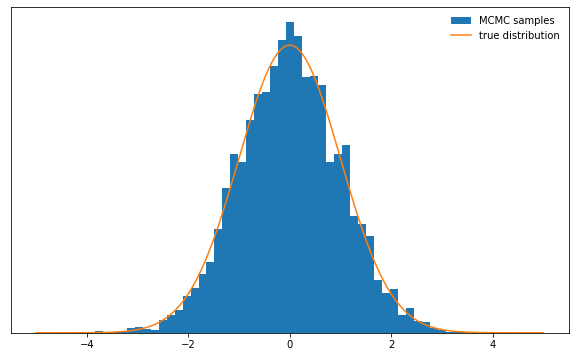

In [8]:
sample_and_display(np.array([2.0]), 3.0, 10000, 500, log_prob)

<h3><b>Ερωτήματα (Μέρος Β)</b></h3>

Να επαναλάβετε για $Δ=30$ και συνολικό αριθμό βημάτων $10000$. Τι παρατηρείτε ότι συμβαίνει στην περίπτωση που χρησιμοποιείτε ένα πολύ μεγάλο βήμα, δηλαδή πολύ μεγάλη τιμή για την παράμετρο $Δ$; Να επαναλάβετε για $Δ=300$, $Δ=3000$ και $Δ=30000$, ώστε να επιβεβαιώσετε το συμπέρασμά σας. Σχολιάστε και το ποσοστό των αποδεκτών βημάτων.

Δ = 30
βήματα = 10,000

Acceptance rate: 0.104


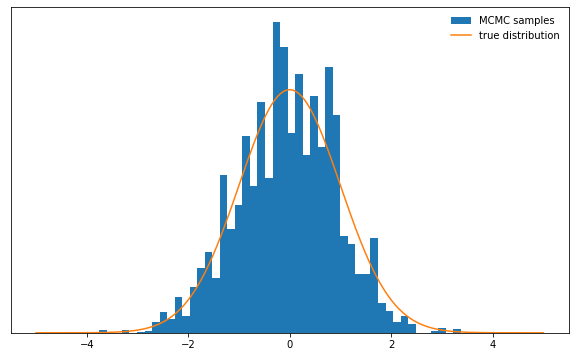

In [12]:
sample_and_display(init_state = np.array([2.0]), stepsize = 30, n_total= 10000, n_burnin = 500, log_prob = log_prob)

Δ = 300
βήματα = 10,000

Acceptance rate: 0.009


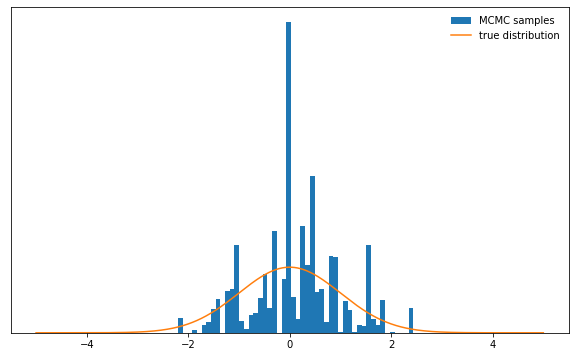

In [13]:
sample_and_display(init_state = np.array([2.0]), stepsize = 300, n_total= 10000, n_burnin = 500, log_prob = log_prob)

Δ = 3,000
βήματα = 10,000

Acceptance rate: 0.001


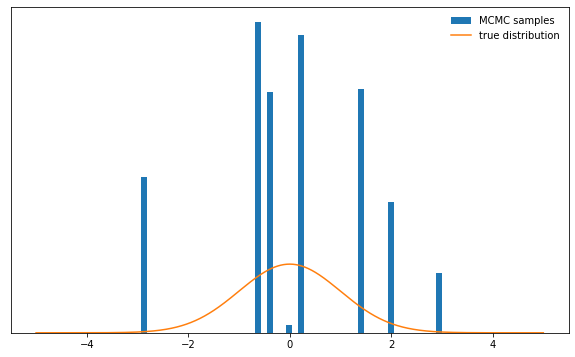

In [14]:
sample_and_display(init_state = np.array([2.0]), stepsize = 3000, n_total= 10000, n_burnin = 500, log_prob = log_prob)

Δ = 30,000
βήματα = 10,000

Acceptance rate: 0.000


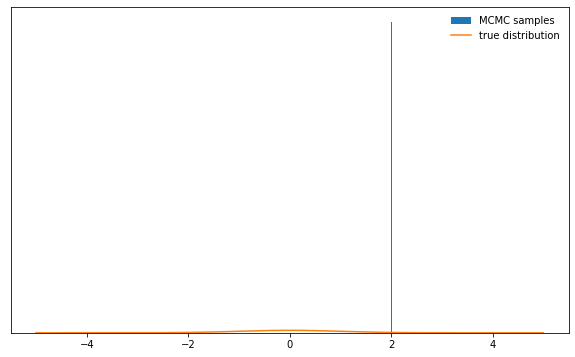

In [15]:
sample_and_display(init_state = np.array([2.0]), stepsize = 30000, n_total= 10000, n_burnin = 500, log_prob = log_prob)

Όπως ήταν αναμενόμενο, αυξάνοντας το stepsize (παράμετρος Δ), ουσιαστικά όντας σε μια κατάσταση/δειγματικό σημείο $x_t$ κοιτάμε για υποψήφια next states \ δειγματικά σημεία $x_{t+1}$ σε μεγαλύτερες αποστάσεις από την κατάσταση $x_t$ μέσω της ομοιόμορφης proposal distribution. Πηγαίνοντας σε τιμές πολύ μεγαλύτερες από το $σ=1$ της τυποποιημένης κανονικής κατανομής που θέλουμε να δειγματοληπτήσουμε, ουσιαστικά θα εξετάζονται κυρίως καταστάσεις/σημεία που έχουν πολύ μικρή πυκνότητα πιθανότητας $p(x)$ και γενικώς θα απορρίπτονται κυρίως. Επομένως και η μορφή που θα λάβουμε για την επιθυμητή κατανομή από τα δειγματικά στοιχεία θα αποκλίνει από την πραγματική όσο θα αυξάνεται το stepsize (Δ), ενώ θα μειώνεται και το acceptance rate.

Να επαναλάβετε για $Δ=0.1$, δηλαδή μία πολύ μικρή τιμή για το βήμα. Τι παρατηρείτε; Είναι ικανοποιητικά τα αποτελέσματά σας; Σχολιάστε και το ποσοστό των αποδεκτών βημάτων. Να επαναλάβετε για $Δ=0.01$.

Acceptance rate: 0.986


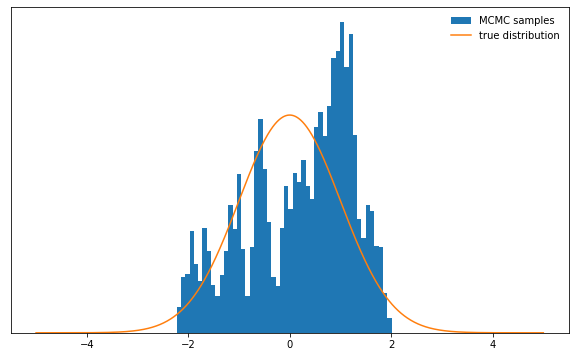

In [16]:
sample_and_display(np.array([2.0]), 0.1, 10000, 500, log_prob)

Δ = 0.01
βήματα = 10,000

Acceptance rate: 0.996


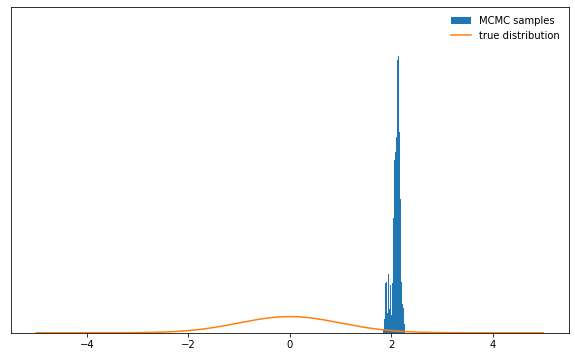

In [31]:
sample_and_display(init_state = np.array([2.0]), stepsize = 0.01, n_total= 10000, n_burnin = 500, log_prob = log_prob)

Παρατηρούμε πως για μικρό stepsize (Δ) ουσιαστικά δεν μπορεί να εξερευνηθεί όλος ο χώρος και ο αλγόριθμος βρίσκει άλλες κορυφές γιατί το βήμα είναι πολύ μικρό και επομένως αν για παράδειγμα φτάσουμε σε μια κατάσταση x με πυκνότητα πιθανότητας p(x) με τιμή μεγαλύτερη ή ίση με το μισό της τιμής της p(x) στην κορυφή της, τότε κοιτώντας πολύ κοντά (μικρό Δ) σε αυτή την κατάσταση για να πάρουμε μια πρόταση για την επόμενη κατάσταση (από το proposal distribution g), τότε θα επιλέξουμε επίσης μια κατάσταση x' με τιμή p(x') κοντά στην τιμή της προηγούμενης κατάστασης p(x) και άρα, ακόμα και αν είναι προς την κατεύθυνση μικρότερης πυκνότητας πιθανότητας (περίπτωση $p(x') < p(x)$), υπάρχει εντούτοις μεγάλη πιθανότητα να γίνει αποδεκτή αυτή η κατάσταση δεδομένου της μεγάλης τιμής $p(x')$. Με βάση αυτό δικαιολογείται η μεγάλη τιμή στο acceptance rate. Επίσης, αυτό φαίνεται να οδηγεί σε ταλάντωση γύρω από μια τέτοια τιμή και μάλιστα βλέπουμε πως υπάρχει έντονη εξάρτηση από την αρχική κατάσταση (εν προκειμένω x=2: initial state) καθώς η κορυφή βρίσκεται να είναι κοντά στην αρχική αυτή κατάσταση.

Να επαναλάβετε αυξάνοντας το συνολικό αριθμό βημάτων που θα πραγματοποιηθούν σε $500000$. Τι παρατηρείτε σχετικά με την ακρίβεια των αποτελεσμάτων σας, αλλά και το χρόνο εκτέλεσης του αλγορίθμου <b><i>Metropolis-Hastings</i></b>;

Acceptance rate: 0.989


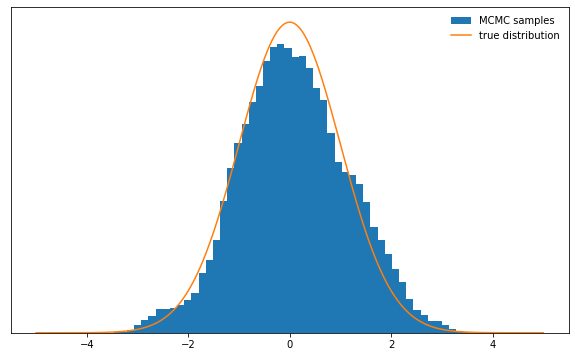

In [32]:
sample_and_display(np.array([2.0]), 0.1, 500000, 25000, log_prob)

Καταρχάς, παρατηρούμε πως ο χρόνος εκτέλεσης αυξάνεται σημαντικά καθώς αυξάνουμε τον αριθμό των βημάτων του αλγορίθμου.
Ωστόσο, τα αποτελέσματα είναι σαφώς βελτιωμένα καθώς ο αλγόριθμος καταφέρνει να λάβει αρκετά δειγματικά στοιχεία και να εξερευνήσει το χώρο ώστε να δώσει σχετικά καλά αποτελέσματα. Ωστόσο, και πάλι παρατηρείται μια μικρή ολίσθηση (όχι κεντράρισμα στο 0) της κατανομής που προκύπτει από τα δειγματικά στοιχεία. Αυτό οφείλεται στο μικρό step size (Δ).

Η συνάρτηση <b><i>sample_and_display</i></b> περιλαμβάνει το n_burnin ως τέταρτο όρισμα. Ποια είναι η χρησιμότητα του ορίσματος αυτού; Δοκιμάστε τις παρακάτω τιμές:
<ul>
<li>$Δ=0.1$, αριθμός βημάτων $1000$ και n_burnin=$10$.</li>
<li>$Δ=0.1$, αριθμός βημάτων $500000$ και n_burnin=$490000$.</li>
</ul>
Τι παρατηρείτε;

Αρχικά, η χρησιμότητα του ορίσματος n_burnin της συνάρτησης sample_and_display ουσιαστικά ορίζει πόσες εκ των αρχικών καταστάσεων (ισοδύναμα δειγματικών στοιχείων) θα αποκοπούν από την αλυσίδα (ισοδύναμα το σύνολο των δειγματικών στοιχείων) καθώς θεωρούμε πως αυτές δεν ανήκουν στην p(x) εφόσον η Markov Chain θέλει κάποιο χρόνο για να βρεθεί στην αναλλοίωτη κατανομή (άρα οι αρχικές καταστάσεις είναι μεταβατικές και αποκόπτονται θέτοντας το όρισμα n_burnin).

Δ = 0.1
βήματα = 1,000
n_burnin = 10

Acceptance rate: 0.974


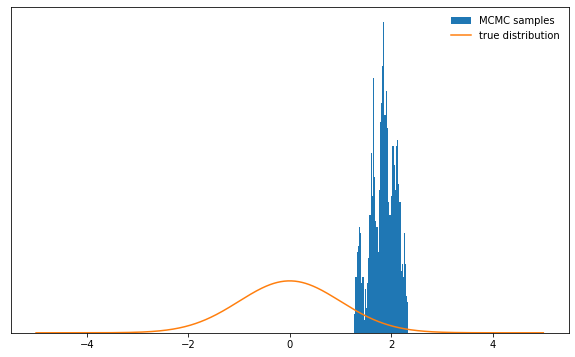

In [35]:
sample_and_display(init_state = np.array([2.0]), stepsize = 0.1, n_total= 1000, n_burnin = 10, log_prob = log_prob)

Με βάση όσα αναφέρθηκαν στα προηγούμενα, αναμέναμε να βρει ο αλγόριθμος κορυφή κοντά στο initial state (x=2) λόγω του μικρού step size (Δ=0.1) και των πολύ λίγων βημάτων (1000), ενώ ο παράγοντας n_burnin δεν επηρεάζει ιδιαίτερα εδώ.

Δ = 0.1
βήματα = 500,000
n_burnin = 490,000

Acceptance rate: 0.990


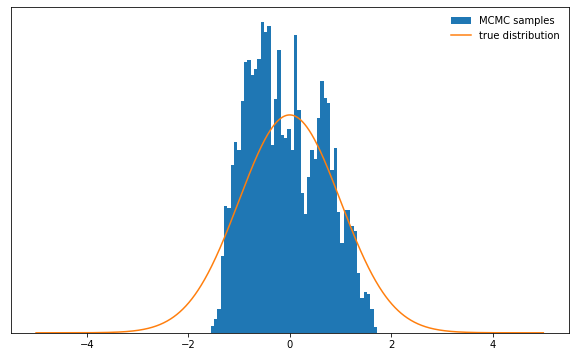

In [37]:
sample_and_display(init_state = np.array([2.0]), stepsize = 0.1, n_total= 500000, n_burnin = 490000, log_prob = log_prob)

Για 500,000 βήματα η κατάσταση βελτιώνεται μεν αλλά και πάλι δεν παίρνουμε τη μορφή που επιθυμούμε και ο λόγος είναι αφενός στο μικρό stepsize που δημιουργεί κορυφές μη κεντραρισμένες στο 0, όπως επίσης και η πολύ υψηλή τιμή του n_burnin που αφαιρεί καταστάσεις (δειγματικά στοιχεία) και από την αναλλοίωτη κατανομή (δηλαδή δειγματικά στοιχεία της p(x) που δε θα έπρεπε να αφαιρεθούν). Για να το δείξουμε αυτό, στο επόμενο διάγραμμα βλέπουμε πόσο βελτιώνεται η δειγματοληψία μας αν απλά αλλάξουμε το n_burnin από 490,000 σε 10,000.

Acceptance rate: 0.990


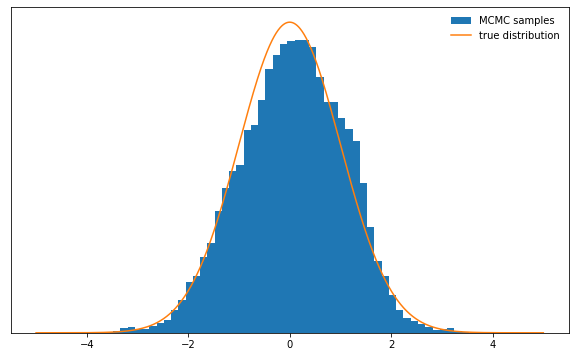

In [38]:
sample_and_display(init_state = np.array([2.0]), stepsize = 0.1, n_total= 500000, n_burnin = 10000, log_prob = log_prob)

Συμπερασματικά, είδαμε πως είναι πολύ σημαντική η επιλογή των παρακάτω παραμέτρων για τη σωστή λειτουργία του αλγορίθμου Metropolis-Hastings:
- βήματα (n_total)
- Δ (stepsize)
- n_burnin

Όσο περισσότερα βήματα γίνονται, τόσο καλύτερα καλύπτεται όλος ο χώρος, καθώς δειγματοληπτούνται περισσότερα δειγματικά στοιχεία από την κατανομή.
Το stepsize πρέπει να επιλέγεται με σύνεση, ώστε να επιτρέπει στον αλγόριθμο να εξερευνά το δειγματικό χώρο πλήρως. Πολύ μεγάλα ή πολύ μικρά stepsizes οδηγούν σε μη επιθυμητά αποτελέσματα. Ενδεχομένως ένα καλό stepsize να είναι κοντά στο εύρος της κατανομής προς δειγματοληψία.
Το n_burning επίσης πρέπει να μην είναι πολύ μικρό ή πολύ μεγάλο γιατί στην πρώτη περίπτωση μπορεί να κρατήσουμε δείγματα που δεν ανήκουν στην αναλλοίωτη κατανομή της αλυσίδας και άρα της επιθυμητής προς δειγματοληψία κατανομής p(x), ενώ στη δεύτερη αφαιρούμε καταστάσεις που δε θα έπρεπε να αφαιρεθούν αλλοιώνοντας την εικόνα της κατανομής που θα προκύψει από τα δειγματικά στοιχεία.

Φυσικά, όπως αναφέρθηκε, και η αρχική κατάσταση (init_state) μπορεί να έχει επίδραση, όπως σε περιπτώσεις που το stepsize είναι μικρό για παράδειγμα.

Πηγές:
- <a href = "https://www.youtube.com/watch?v=yCv2N7wGDCw">https://www.youtube.com/watch?v=yCv2N7wGDCw</a>
- <a href = "https://machinelearningmastery.com/markov-chain-monte-carlo-for-probability/">https://machinelearningmastery.com/markov-chain-monte-carlo-for-probability/</a>
- <a href = "https://www.tweag.io/blog/2019-10-25-mcmc-intro1/">https://www.tweag.io/blog/2019-10-25-mcmc-intro1/</a>